># **_Raffi Dilanchian_ -            951811193016**
># **_MohammadHossein Komeili_ -     951811193033**
>### **K_means** clustering algorithm on **AT&T** dataset assignment

In [1]:
#in case of not having this package
#! pip install pillow

In [2]:
# importing main libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from os.path import join
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 10)

In [3]:
# ReadFile method for reading and resizing images

data_folder = "att_faces/s"

def ReadFile(num,index):
    file_path = join(data_folder + str(num), str(index) + ".pgm")
    loaded_image=np.array(plt.imread(file_path))
    image_32x32 = cv2.resize(loaded_image, (32, 32), interpolation=cv2.IMREAD_GRAYSCALE)
    image_1024 = image_32x32.reshape(-1)
    return image_1024
    

In [4]:
X = np.array([],dtype=int)
y = []

for folder in range(1,41):
    for index in range(1,11):
        image_1024 = ReadFile(folder, index)
        X = np.concatenate((X,image_1024),axis=0)
        y.append(folder)
        
X = np.reshape(X, (400, 1024))

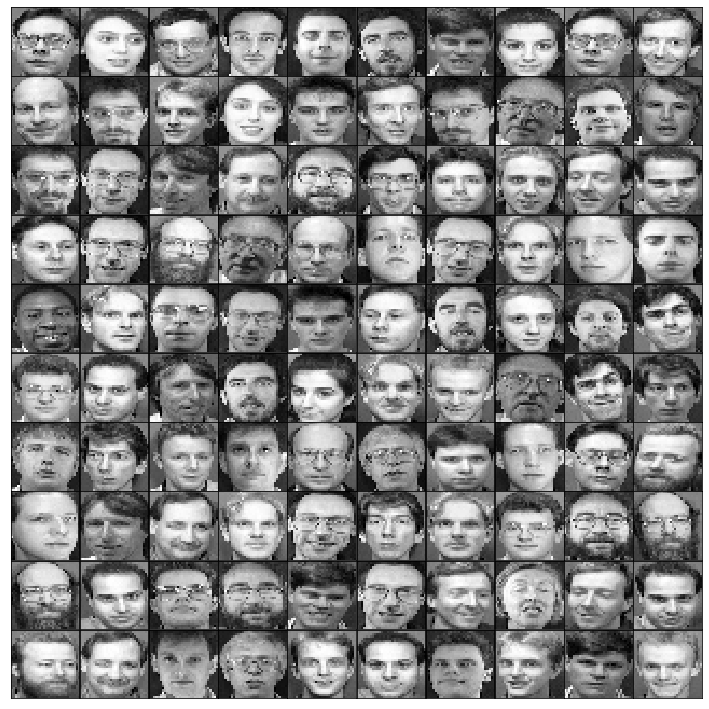

In [5]:
X_samples = np.random.permutation(X)[:100]

fig, axes = plt.subplots(10, 10, figsize=(16, 16))
fig.subplots_adjust(left=0.2, bottom=0.2, right=0.8, top=0.8, hspace=0.01, wspace=0.01)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_samples[i].reshape((32,32)), cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

In [6]:
print("shape of X: ", np.shape(X))
print("shape of y: ", len(y))

shape of X:  (400, 1024)
shape of y:  400


In [7]:
pca = PCA(n_components=2, random_state=42)
pca.fit(X)
U = pca.components_          # Principal Components (directions)
S = pca.explained_variance_  # importance of ecah direction (variances)
print("1st Principal Component: {} ({:.2f})".format(U[0], S[0]))
print("2nd Principal Component: {} ({:.2f})".format(U[1], S[1]))

1st Principal Component: [-0.00567276 -0.0057327  -0.00466915 ... -0.0203778  -0.01925249
 -0.0148158 ] (279859.63)
2nd Principal Component: [-0.04917737 -0.04900458 -0.04924189 ...  0.01411299  0.01066797
  0.02009103] (209500.87)


In [8]:
print(np.linalg.norm(U[0]))
print(np.linalg.norm(U[1]))
print(np.dot(U[0], U[1]))

0.9999999999999996
0.9999999999999994
6.678685382510707e-17


In [28]:
pca = PCA(n_components=2)  
X_proj = pca.fit_transform(X)  # project from 64 to 2 dimensions

print("Shape of original data:  {}".format(X.shape))
print("Shape of projected data: {}".format(X_proj.shape))




Shape of original data:  (400, 1024)
Shape of projected data: (400, 2)


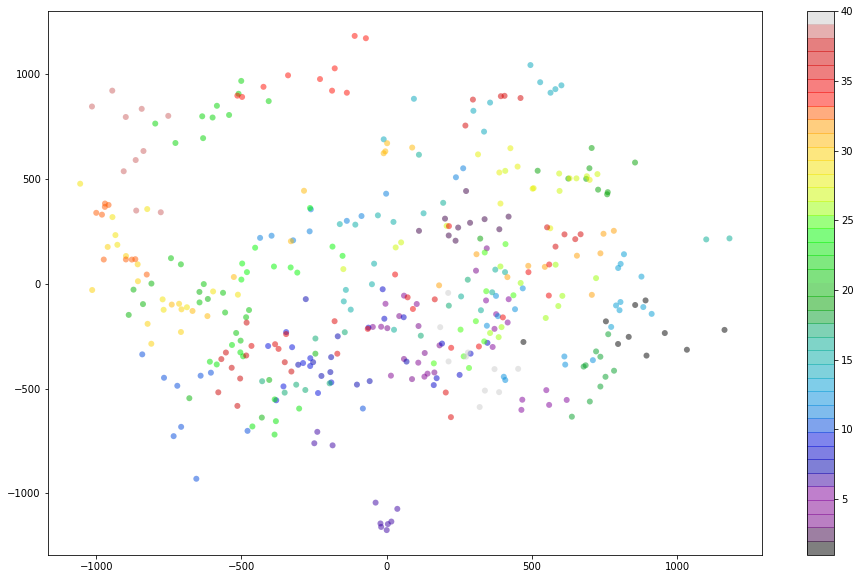

In [29]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], 
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 40))
plt.colorbar()
plt.show()

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
# importing FCM from sklearn

number_of_itterations = 20
mean_accuracy_kmeans = 0
mean_accuracy_FCM = 0
mean_silhouette_kmeans = 0
mean_silhouette_FCM = 0

for itter in range(number_of_itterations):
    kmeans = KMeans(n_clusters=40)
    kmeans_labels = kmeans.fit_predict(X)
#     fcm = FCM 
#     fcm_labels= FCM

    mean_accuracy_kmeans += accuracy_score(y, kmeans_labels)
    mean_silhouette_kmeans += silhouette_score(X, kmeans_labels)
#     mean_accuracy_FCM
#     mean_silhouette_FCM
    
mean_accuracy_kmeans /= number_of_itterations
mean_silhouette_kmeans /= number_of_itterations
# mean_accuracy_FCM /= number_of_itterations
# mean_silhouette_FCM /= number_of_itterations
    
    
#print(labels)

NameError: name 'X' is not defined

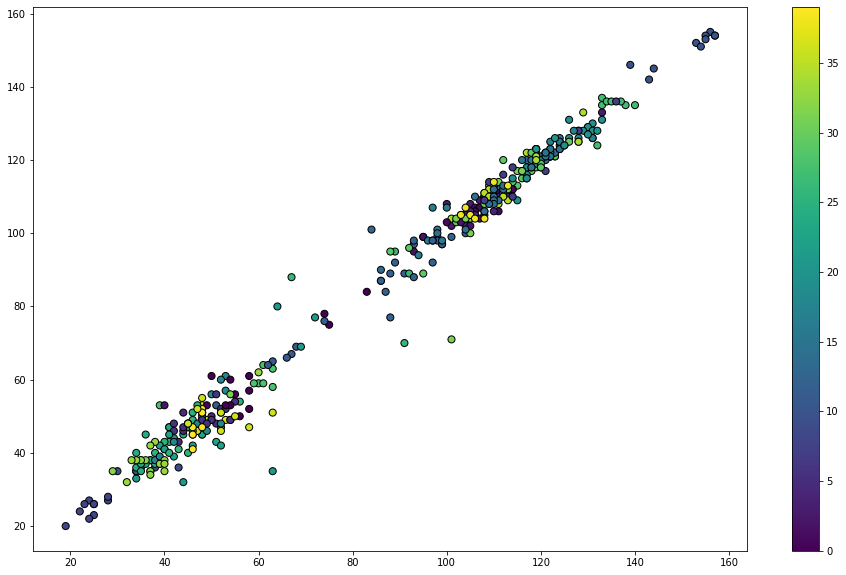

In [31]:
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', s=50, c=labels);
plt.colorbar()
plt.show()

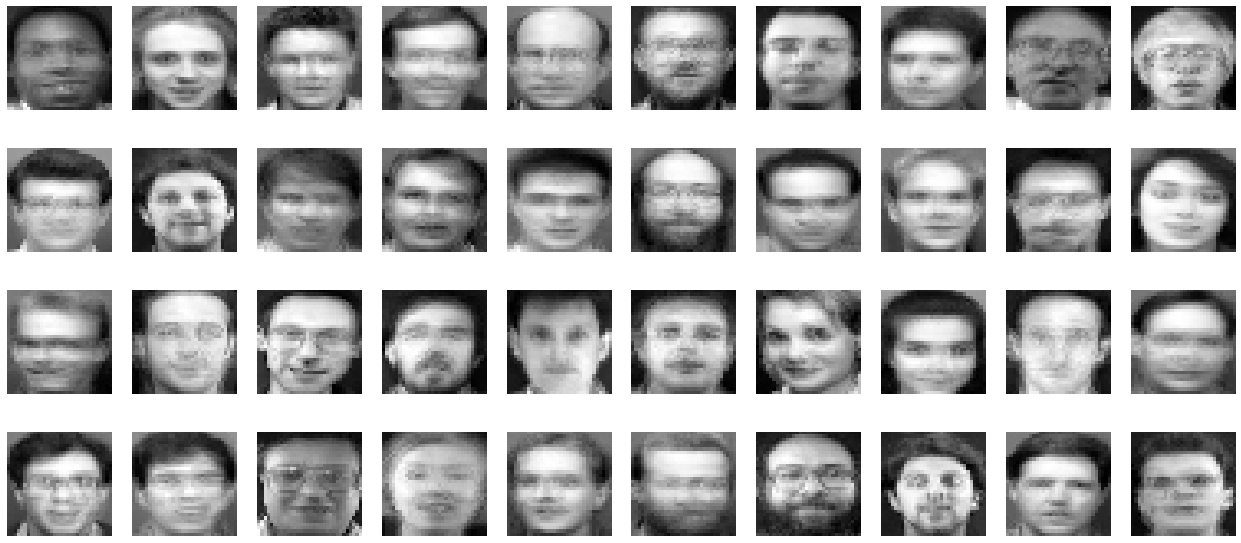

In [15]:
# visualize the cluster centers
fig = plt.figure(figsize=(22,10))
for i in range(40):
    ax = fig.add_subplot(4,10, 1 + i)
    ax.imshow(kmeans.cluster_centers_[i].reshape((32,32)), cmap=plt.cm.gray)
    ax.grid(False)
    ax.axis('off')
